In [66]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv('/content/Diabetes_Type1.csv')

In [68]:
# first 5 rows of the dataframe
data.head(5)

,Age,Sex,Area of Residence,HbA1c,Height,Weight,BMI,Duration of disease,Other diease,Adequate Nutrition,...,Standardized birth weight,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child,Affected
0,greater then 15,Female,Suburban,Over 7.5%,1.50,56.0,24.888889,4y,no,No,...,Middle quartiles,Yes,Yes,Yes,Injection,Yes,No,Yes,Yes,0
1,greater then 15,Female,Suburban,Over 7.5%,1.48,58.0,26.479182,1w,none,No,...,Middle quartiles,Yes,No,Yes,Injection,Yes,Yes,Yes,Yes,1
2,Less then 11,Female,Urban,Over 7.5%,1.20,46.0,31.944444,9d,none,Yes,...,Middle quartiles,Yes,No,No,Injection,Yes,No,No,No,1
3,Less then 15,Female,Suburban,Over 7.5%,1.65,50.0,18.365473,1w,none,Yes,...,Middle quartiles,No,No,Yes,Injection,No,Yes,No,No,0
4,Less then 15,Female,Suburban,Over 7.5%,1.61,59.0,22.761468,1m,liver problem,Yes,...,Middle quartiles,Yes,No,No,Injection,Yes,Yes,No,No,1


In [69]:
# number of rows and columns
data.shape

(70015, 22)

In [ ]:
# checking for missing values
data.isnull().sum()

In [71]:
# statistical Measures of the dataset
data.describe()

,Height,Weight,BMI,Affected
count,70015.000000,70015.000000,70015.000000,70015.000000
mean,1.336153,38.007498,20.895587,0.436035
std,0.270728,16.340687,6.063949,0.495895
min,0.440000,5.000000,10.077936,0.000000
25%,1.200000,25.000000,16.928286,0.000000
50%,1.370000,38.000000,19.812365,0.000000
75%,1.550000,49.000000,23.725286,1.000000
max,1.830000,87.000000,61.983471,1.000000


In [72]:
#checking unique values
data.nunique()


Age                                            40
Sex                                             2
Area of Residence                               3
HbA1c                                           2
Height                                         71
Weight                                         68
BMI                                           257
Duration of disease                            35
Other diease                                   40
Adequate Nutrition                              2
Education of Mother                             2
Standardized growth-rate in infancy             3
Standardized birth weight                       4
Autoantibodies                                  2
Impaired glucose metabolism                     2
Insulin taken                                   2
How Taken                                       2
Family History affected in Type 1 Diabetes      2
Family History affected in Type 2 Diabetes      2
Hypoglycemis                                    2


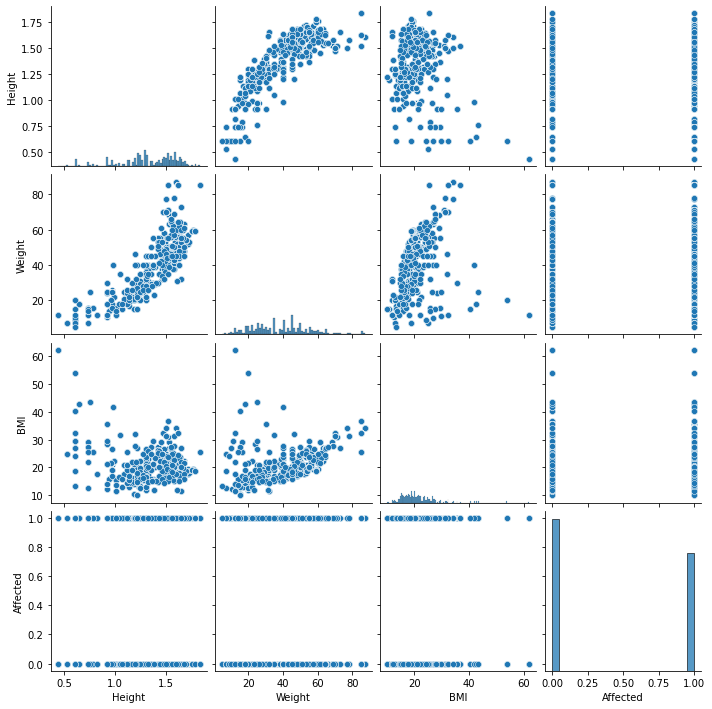

In [73]:
#Visualize the relation between two variables
import seaborn as sns
sns.pairplot(data)


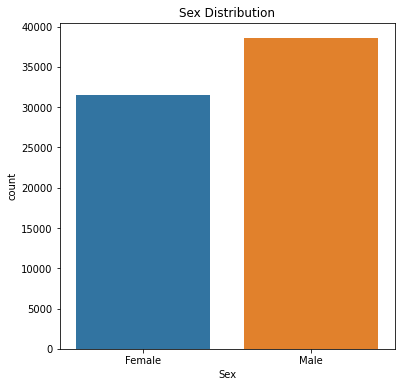

In [74]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')
plt.show()

In [75]:
data['Sex'].value_counts()

Male      38553
Female    31462
Name: Sex, dtype: int64

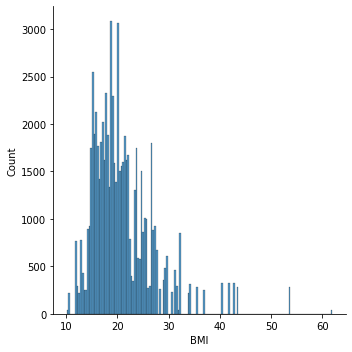

In [77]:
# bmi distribution
sns.displot(data['BMI'])

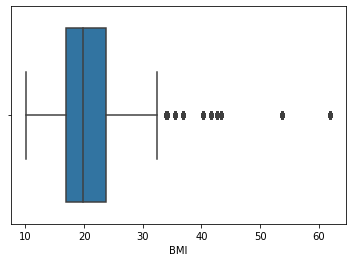

In [76]:
sns.boxplot(x='BMI',data=data)

# Data Pre-Processing



In [78]:
AgeColumnDummy = pd.get_dummies(data['Age'])
data = pd.concat((data,AgeColumnDummy), axis=1)
data = data.drop(['Age'], axis=1)
data.head(5)

,Sex,Area of Residence,HbA1c,Height,Weight,BMI,Duration of disease,Other diease,Adequate Nutrition,Education of Mother,...,greater then 41,greater then 42,greater then 43,greater then 44,greater then 45,greater then 46,greater then 47,greater then 48,greater then 49,greater then 50
0,Female,Suburban,Over 7.5%,1.50,56.0,24.888889,4y,no,No,No,...,0,0,0,0,0,0,0,0,0,0
1,Female,Suburban,Over 7.5%,1.48,58.0,26.479182,1w,none,No,No,...,0,0,0,0,0,0,0,0,0,0
2,Female,Urban,Over 7.5%,1.20,46.0,31.944444,9d,none,Yes,No,...,0,0,0,0,0,0,0,0,0,0
3,Female,Suburban,Over 7.5%,1.65,50.0,18.365473,1w,none,Yes,No,...,0,0,0,0,0,0,0,0,0,0
4,Female,Suburban,Over 7.5%,1.61,59.0,22.761468,1m,liver problem,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data = data.drop(['Area of Residence '], axis=1)

In [80]:
HbA1cofResidenceColumnDummy = pd.get_dummies(data['HbA1c'])
data = pd.concat((data,HbA1cofResidenceColumnDummy), axis=1)
data = data.drop(['HbA1c'], axis=1)

In [81]:
data = data.drop(['Duration of disease'], axis=1)

In [82]:
OtherdieaseColumnDummy = pd.get_dummies(data['Other diease'])
data = pd.concat((data,OtherdieaseColumnDummy), axis=1)
data = data.drop(['Other diease'], axis=1)

In [83]:
AdequateNutritionColumnDummy = pd.get_dummies(data['Adequate Nutrition '])
data = pd.concat((data,AdequateNutritionColumnDummy), axis=1)
data = data.drop(['Adequate Nutrition '], axis=1)

In [84]:
data = data.drop(['Education of Mother'], axis=1)

In [85]:
StandardizedgrowthrateininfancyColumnDummy = pd.get_dummies(data['Standardized growth-rate in infancy'])
data = pd.concat((data,StandardizedgrowthrateininfancyColumnDummy), axis=1)
data = data.drop(['Standardized growth-rate in infancy'], axis=1)

In [86]:
StandardizedbirthweightColumnDummy = pd.get_dummies(data['Standardized birth weight'])
data = pd.concat((data,StandardizedbirthweightColumnDummy), axis=1)
data = data.drop(['Standardized birth weight'], axis=1)

In [87]:
AutoantibodiesColumnDummy = pd.get_dummies(data['Autoantibodies'])
data = pd.concat((data,AutoantibodiesColumnDummy), axis=1)
data = data.drop(['Autoantibodies'], axis=1)

In [88]:
ImpairedglucosemetabolismColumnDummy = pd.get_dummies(data['Impaired glucose metabolism '])
data = pd.concat((data,ImpairedglucosemetabolismColumnDummy), axis=1)
data = data.drop(['Impaired glucose metabolism '], axis=1)

In [89]:
InsulintakenColumnDummy = pd.get_dummies(data['Insulin taken'])
data = pd.concat((data,InsulintakenColumnDummy), axis=1)
data = data.drop(['Insulin taken'], axis=1)

In [90]:
data = data.drop(['How Taken'], axis=1)

In [91]:
FamilyHistoryaffectedinType1DiabetesColumnDummy = pd.get_dummies(data['Family History affected in Type 1 Diabetes'])
data = pd.concat((data,FamilyHistoryaffectedinType1DiabetesColumnDummy), axis=1)
data = data.drop(['Family History affected in Type 1 Diabetes'], axis=1)

In [92]:
FamilyHistoryaffectedinType2DiabetesColumnDummy = pd.get_dummies(data['Family History affected in Type 2 Diabetes'])
data = pd.concat((data,FamilyHistoryaffectedinType2DiabetesColumnDummy), axis=1)
data = data.drop(['Family History affected in Type 2 Diabetes'], axis=1)

In [93]:
HypoglycemisColumnDummy = pd.get_dummies(data['Hypoglycemis'])
data = pd.concat((data,HypoglycemisColumnDummy), axis=1)
data = data.drop(['Hypoglycemis'], axis=1)

In [94]:
pancreaticdiseaseaffectedinchildColumnDummy = pd.get_dummies(data['pancreatic disease affected in child '])
data = pd.concat((data,pancreaticdiseaseaffectedinchildColumnDummy), axis=1)
data = data.drop(['pancreatic disease affected in child '], axis=1)


In [95]:
SexColumnDummy = pd.get_dummies(data['Sex'])
data = pd.concat((data,SexColumnDummy), axis=1)
data = data.drop(['Sex'], axis=1)

In [96]:
data.head(2)

,Height,Weight,BMI,Affected,Less then 11,Less then 15,Less then 16,Less then 5,greater then 15,greater then 16,...,No,Yes,No,Yes,No,Yes,No,Yes,Female,Male
0,1.50,56.0,24.888889,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
1,1.48,58.0,26.479182,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0


# Splitting the Features and Target

In [97]:
features = data.columns
features = [x for x in features if x != 'Affected']

# Split the data into training and testing data using the train_test_split function

In [98]:
train, test = train_test_split(data, test_size = 0.25)
print(len(data))
print(len(train))
print(len(test))

70015
52511
17504


In [99]:
print(train.shape,test.shape,data.shape)

(52511, 111) (17504, 111) (70015, 111)


# Decision Tree

In [100]:
dt = DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')
x_train = train[features]
y_train = train["Affected"]

x_test = test[features]
y_test = test["Affected"]

In [101]:
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [102]:
score = accuracy_score(y_test, y_pred)*100
print("Accuracy using desicion Tree: ", round(score, 2), "%" )

Accuracy using desicion Tree:  93.45 %


# Confusion matrix by Decision Tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


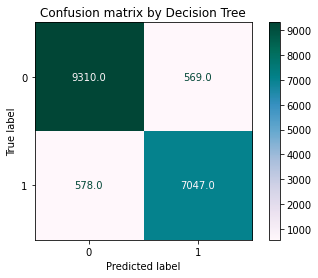

In [103]:
plot_confusion_matrix(dt, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by Decision Tree")
plt.show()

In [106]:
# from the confusion matrix
TP = true_pos = 7047
TN = true_neg = 9310
FP = false_pos =569
FN = false_neg = 578

In [108]:
# Sensitivity
results = {}
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.924


In [109]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.942


# Classification_report by Decision Tree

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9879
           1       0.93      0.92      0.92      7625

    accuracy                           0.93     17504
   macro avg       0.93      0.93      0.93     17504
weighted avg       0.93      0.93      0.93     17504



# Random Forest

In [111]:
rf = RandomForestClassifier(n_estimators=100,max_depth=9)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)


In [112]:
score1 = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy using random forest:",round(score1, 2), "%")

Accuracy using random forest: 93.42 %


# Confusion matrix by Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


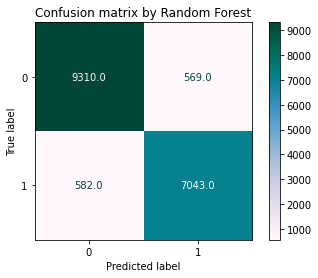

In [113]:
plot_confusion_matrix(rf, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by Random Forest")
plt.show()

In [114]:
# from the confusion matrix
TP = true_pos = 7043
TN = true_neg = 9310
FP = false_pos =569
FN = false_neg = 582

In [115]:
# Sensitivity
results = {}
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.924


In [116]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.942


# Classification_report by Random Forest

In [117]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9879
           1       0.93      0.92      0.92      7625

    accuracy                           0.93     17504
   macro avg       0.93      0.93      0.93     17504
weighted avg       0.93      0.93      0.93     17504



# SVM

In [118]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)
score5 = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy using SVC Model:",round(score5, 2), "%")

Accuracy using SVC Model: 92.98 %


# Confusion matrix by SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


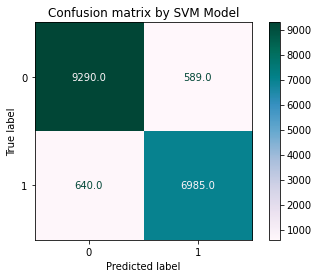

In [119]:
plot_confusion_matrix(svc, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by SVM Model")
plt.show()

In [120]:
# from the confusion matrix
TP = true_pos = 6985
TN = true_neg = 9290
FP = false_pos =589
FN = false_neg = 640

In [123]:
# Sensitivity
results = {}
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")


TPR is  0.916
TNR is  0.940


# Classification_report by SVM

In [124]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9879
           1       0.92      0.92      0.92      7625

    accuracy                           0.93     17504
   macro avg       0.93      0.93      0.93     17504
weighted avg       0.93      0.93      0.93     17504



# Logistic Regression

In [125]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [126]:
score3 = accuracy_score(y_test, y_pred_lr)*100
print("Accuracy using logistic regression:",round(score3, 2), "%")

Accuracy using logistic regression: 92.97 %


# Confusion matrix by Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


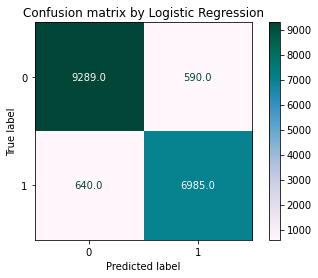

In [127]:
plot_confusion_matrix(lr, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by Logistic Regression")
plt.show()

In [128]:
# from the confusion matrix
TP = true_pos = 6985
TN = true_neg = 9289
FP = false_pos =590
FN = false_neg = 640

In [129]:
# Sensitivity
results = {}
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.916
TNR is  0.940


# Classification_report by Logistic Regression

In [130]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9879
           1       0.92      0.92      0.92      7625

    accuracy                           0.93     17504
   macro avg       0.93      0.93      0.93     17504
weighted avg       0.93      0.93      0.93     17504



# K-Nearest Neighbor

In [131]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train,y_train)
y_pred_kn = kn.predict(x_test)
score4 = accuracy_score(y_test, y_pred_kn)*100
print("Accuracy using K-Nearest Neighbor:",round(score4, 2), "%")

Accuracy using K-Nearest Neighbor: 93.5 %


# Confusion matrix by K-Nearest Neighbor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


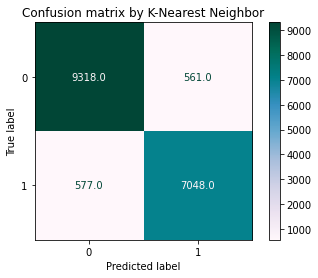

In [132]:
plot_confusion_matrix(kn, x_test, y_test,cmap='PuBuGn',values_format='.1f')  
plt.title("Confusion matrix by K-Nearest Neighbor")
plt.show()

In [133]:
# from the confusion matrix
TP = true_pos = 7048
TN = true_neg = 9318
FP = false_pos =561
FN = false_neg = 577

In [135]:
# Sensitivity
results = {}
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.924
TNR is  0.943


# Classification_report by K-Nearest Neighbor

In [136]:
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9879
           1       0.93      0.92      0.93      7625

    accuracy                           0.93     17504
   macro avg       0.93      0.93      0.93     17504
weighted avg       0.93      0.93      0.93     17504



# Plot ROC and compare AUC

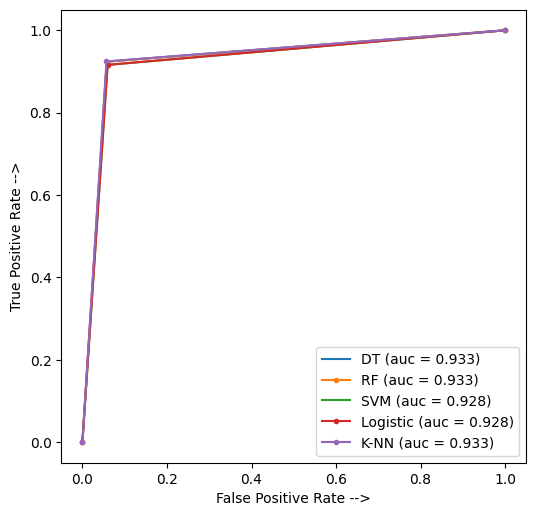

In [137]:

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_kn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(6, 6), dpi=100)

plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_dt)

plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % auc_rf)

plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.plot(knn_fpr, knn_tpr, marker='.', label='K-NN (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

plt.show()